# Evaluation examples

In [217]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
%autoreload 2
simulation = Simulator(n_nodes = 7, n_edges = 13, seed = 1234)
cluster_dag = simulation.run()

2023-07-26 20:06:08,204 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [219]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X7', 'X2'], 'C2': ['X3'], 'C3': ['X4'], 'C4': ['X5', 'X1', 'X6']}
[('C1', 'C4'), ('C1', 'C2'), ('C1', 'C3'), ('C2', 'C4'), ('C3', 'C4')]


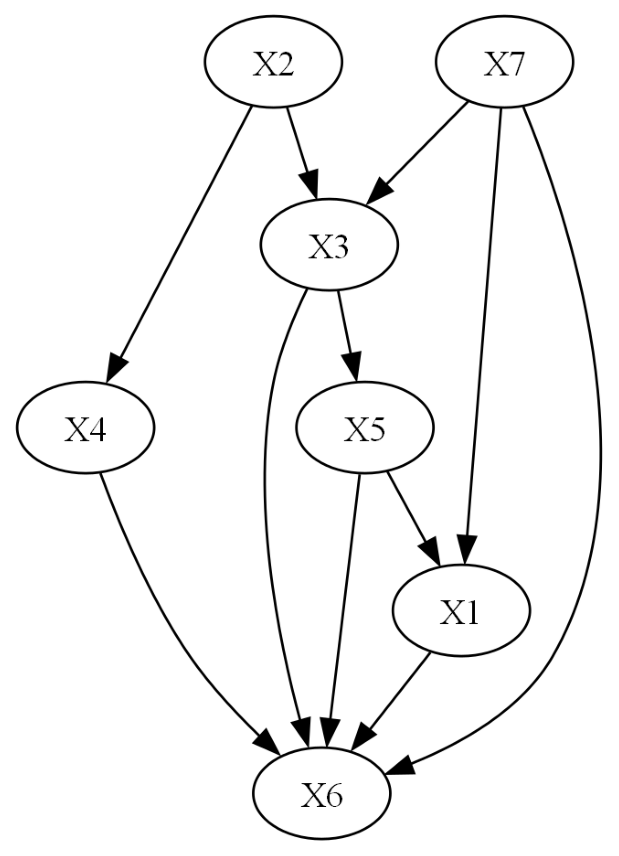

In [220]:
cluster_dag.true_dag.draw_pydot_graph()

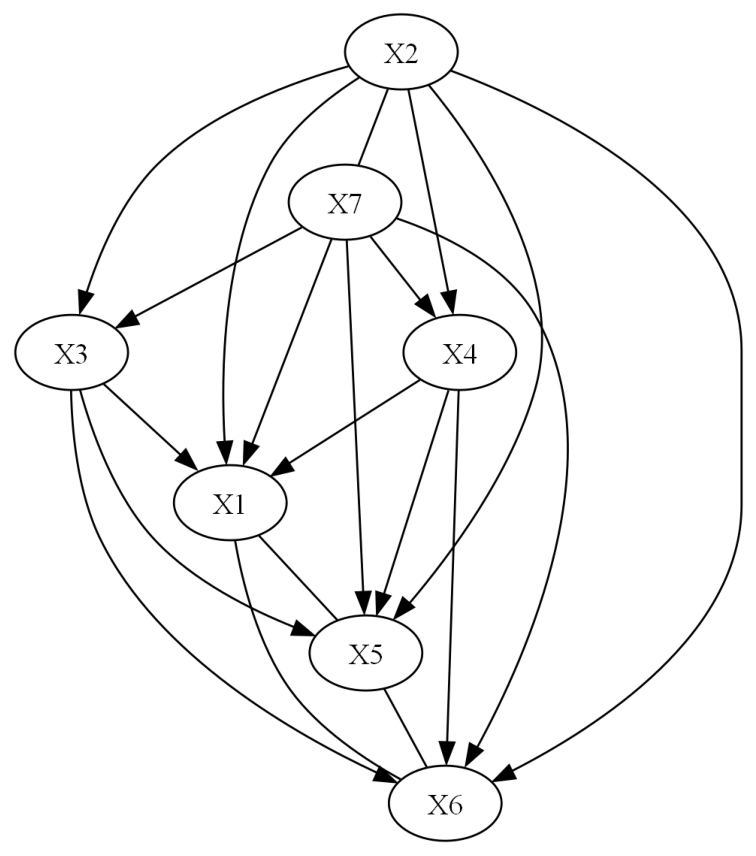

In [221]:
cluster_dag.cdag_to_mpdag()
cluster_dag.draw_mpdag()

In [222]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()


Beginning work on cluster C1

Intra phase in cluster C1


Depth=0, working on node 6: 100%|██████████| 2/2 [00:00<00:00, 333.64it/s]


Deleted edge from 1 to 6

Beginning work on cluster C2

Inter phase between low cluster C2 and parent C1


Depth=1, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 300.17it/s] 



Intra phase in cluster C2


Depth=1, working on node 2: 100%|██████████| 1/1 [00:00<00:00, 199.24it/s] 



Beginning work on cluster C3

Inter phase between low cluster C3 and parent C1


Depth=0, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 427.76it/s] 


Deleted edge from X7 to X4

Intra phase in cluster C3


Depth=0, working on node 3: 100%|██████████| 1/1 [00:00<00:00, 200.14it/s] 



Beginning work on cluster C4

Inter phase between low cluster C4 and parent C1


Depth=4, working on node 4:  60%|██████    | 3/5 [00:00<00:00, 1007.60it/s]

Deleted edge from X1 to X2
Deleted edge from X5 to X1
Deleted edge from X5 to X7
Deleted edge from X2 to X5
Deleted edge from X6 to X2


Depth=4, working on node 6: 100%|██████████| 5/5 [00:00<00:00, 501.39it/s] 



Inter phase between low cluster C4 and parent C2


Depth=4, working on node 2:  50%|█████     | 2/4 [00:00<00:00, 667.14it/s] 

Deleted edge from X1 to X3


Depth=4, working on node 5: 100%|██████████| 4/4 [00:00<00:00, 363.84it/s]



Inter phase between low cluster C4 and parent C3


Depth=4, working on node 5: 100%|██████████| 4/4 [00:00<00:00, 500.30it/s] 


Deleted edge from X1 to X4
Deleted edge from X4 to X5

Intra phase in cluster C4


Depth=4, working on node 5: 100%|██████████| 3/3 [00:00<00:00, 428.84it/s] 


Applying edge orientation rules
Duration of algorithm was 0.5020949840545654sec


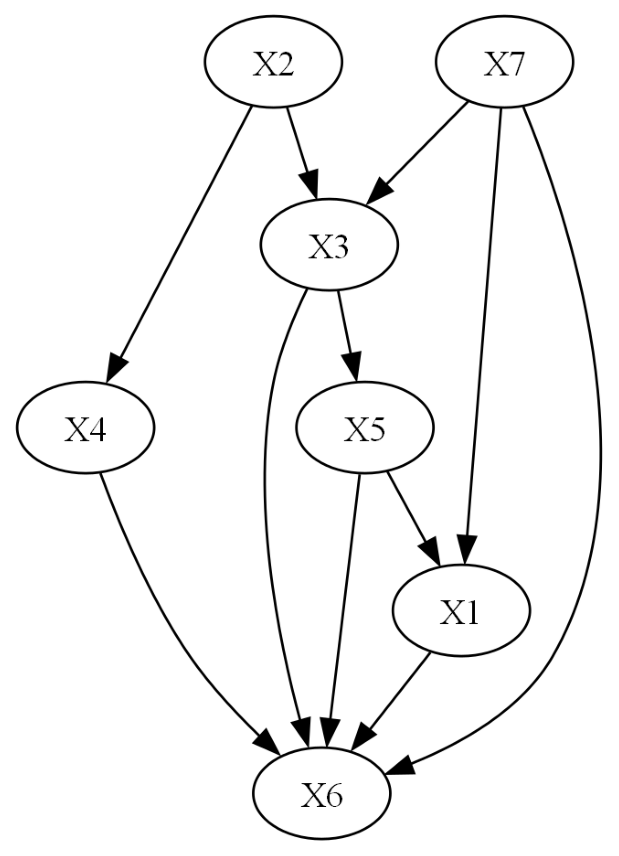

In [223]:
cluster_dag.true_dag.draw_pydot_graph()

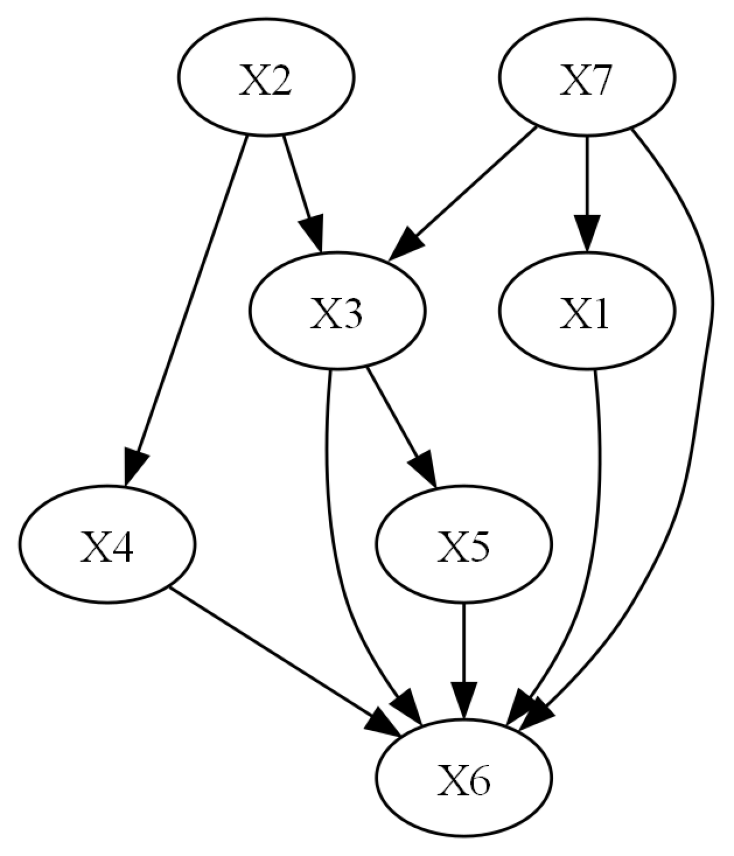

In [224]:
est_graph.draw_pydot_graph()

In [225]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 10, 'false_positive': 0, 'false_negative': 1, 'true_negative': 10, 'precision': 1.0, 'recall': 0.9090909090909091}
Arrow confusion:  {'true_positive': 10.0, 'false_positive': 0.0, 'false_negative': 1.0, 'true_negative': 38.0, 'precision': 1.0, 'recall': 0.9090909090909091, 'true_positive_ce': 10.0, 'false_positive_ce': 0.0, 'false_negative_ce': 0.0, 'true_negative_ce': 39.0, 'precision_ce': 1.0, 'recall_ce': 1.0}
SHD:  1


In [232]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(cluster_dag.data, verbose=False)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
adjacency_confusion, arrow_confusion, shd = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Depth=2, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 416.92it/s] 

Adjacency confusion:  {'true_positive': 5, 'false_positive': 1, 'false_negative': 0, 'true_negative': 4, 'precision': 0.8333333333333334, 'recall': 1.0}
Arrow confusion:  {'true_positive': 4.0, 'false_positive': 0.0, 'false_negative': 1.0, 'true_negative': 20.0, 'precision': 1.0, 'recall': 0.8, 'true_positive_ce': 4.0, 'false_positive_ce': 0.0, 'false_negative_ce': 1.0, 'true_negative_ce': 20.0, 'precision_ce': 1.0, 'recall_ce': 0.8}
SHD:  1


### Low dimensional example

In [226]:
simulation = Simulator(n_nodes = 5, n_edges = 4, seed = 42)
cluster_dag = simulation.run()

2023-07-26 20:06:12,484 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


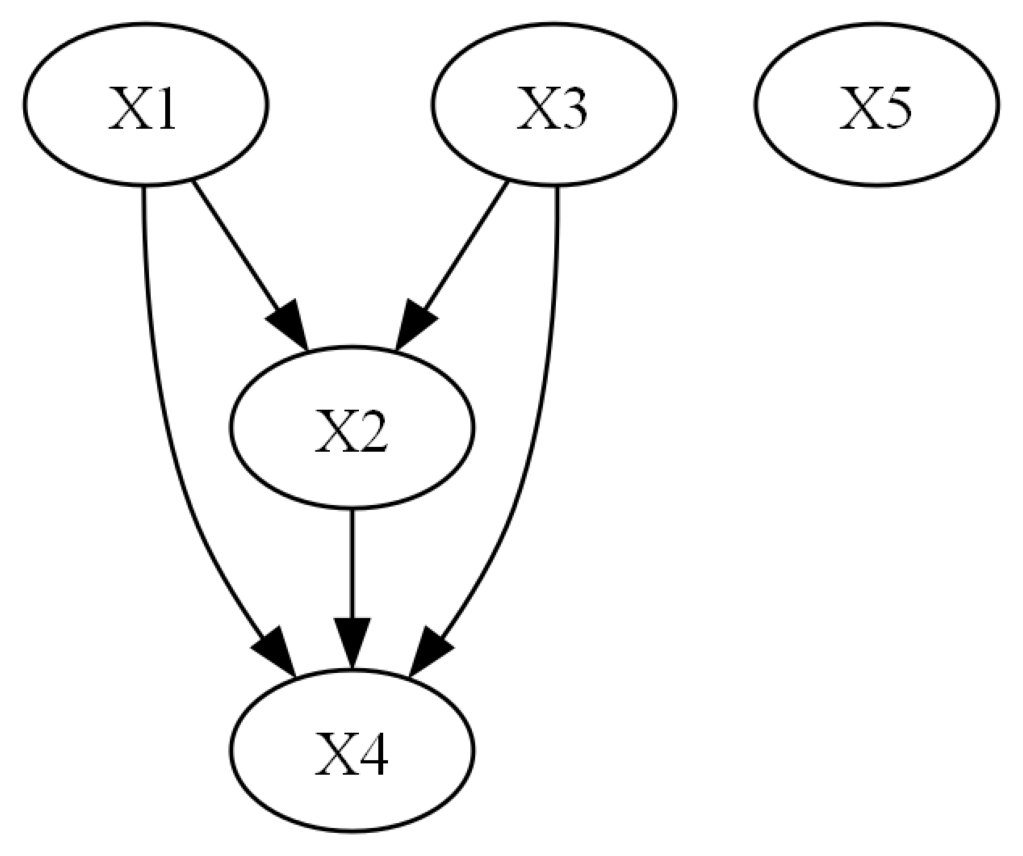

In [227]:
cluster_dag.true_dag.draw_pydot_graph()

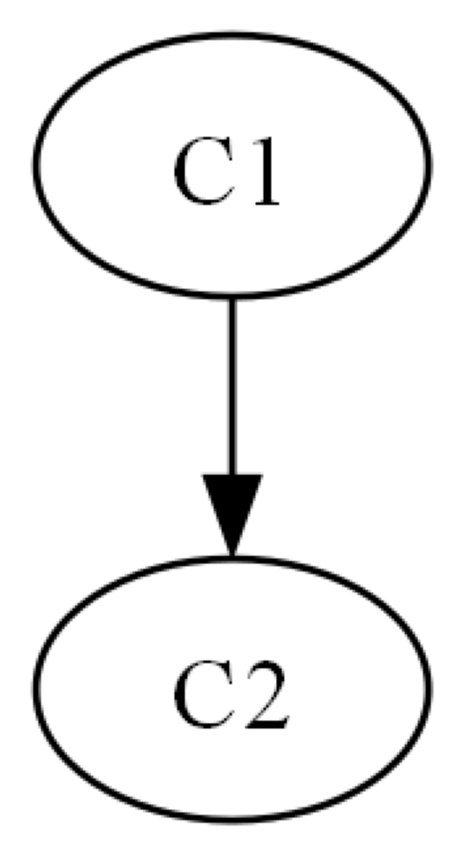

{'C1': ['X1', 'X3'], 'C2': ['X5', 'X2', 'X4']}


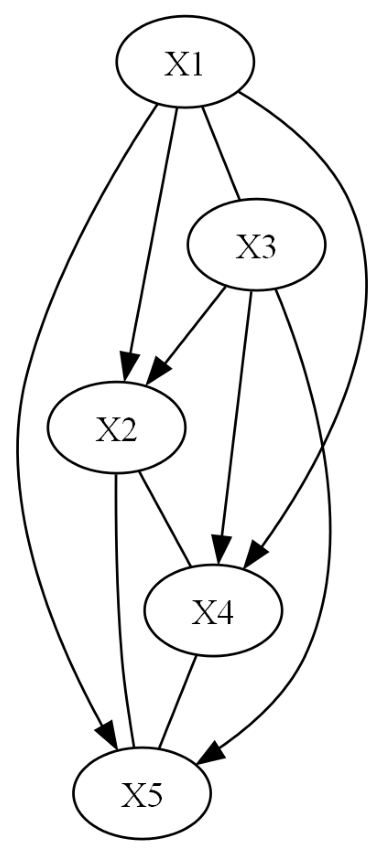

In [228]:
cluster_dag.draw_cluster_graph()
cluster_dag.cdag_to_mpdag()
print(cluster_dag.cluster_mapping)
cluster_dag.draw_mpdag()

In [229]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()


Beginning work on cluster C1

Intra phase in cluster C1


Depth=0, working on node 2: 100%|██████████| 2/2 [00:00<00:00, 400.22it/s] 


Deleted edge from 0 to 2

Beginning work on cluster C2

Inter phase between low cluster C2 and parent C1


Depth=2, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 357.86it/s] 


Deleted edge from X5 to X1
Deleted edge from X4 to X5
Deleted edge from X2 to X5

Intra phase in cluster C2


Depth=2, working on node 4: 100%|██████████| 3/3 [00:00<00:00, 430.11it/s] 

Applying edge orientation rules
Duration of algorithm was 0.0999453067779541sec


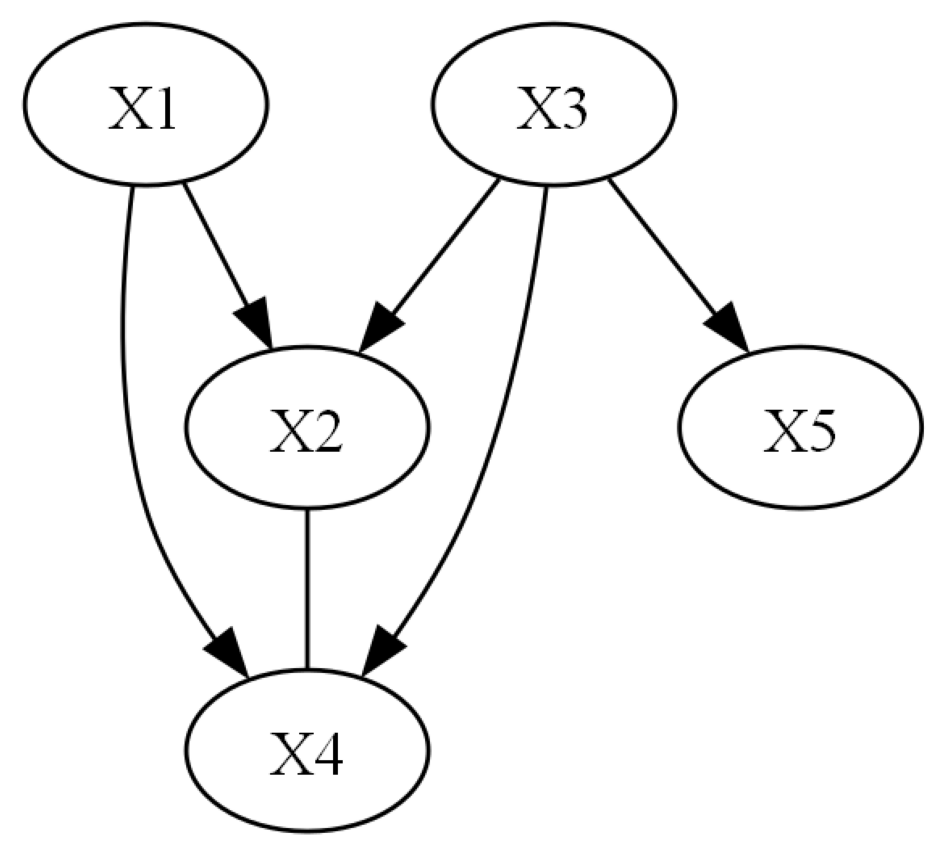

In [230]:
est_graph.draw_pydot_graph()

In [233]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 5, 'false_positive': 1, 'false_negative': 0, 'true_negative': 4, 'precision': 0.8333333333333334, 'recall': 1.0}
Arrow confusion:  {'true_positive': 4.0, 'false_positive': 1.0, 'false_negative': 1.0, 'true_negative': 19.0, 'precision': 0.8, 'recall': 0.8, 'true_positive_ce': 4.0, 'false_positive_ce': 0.0, 'false_negative_ce': 1.0, 'true_negative_ce': 20.0, 'precision_ce': 1.0, 'recall_ce': 0.8}
SHD:  1


In [234]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(cluster_dag.data, verbose=False)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
adjacency_confusion, arrow_confusion, shd = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Depth=2, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 312.70it/s] 

Adjacency confusion:  {'true_positive': 5, 'false_positive': 1, 'false_negative': 0, 'true_negative': 4, 'precision': 0.8333333333333334, 'recall': 1.0}
Arrow confusion:  {'true_positive': 4.0, 'false_positive': 0.0, 'false_negative': 1.0, 'true_negative': 20.0, 'precision': 1.0, 'recall': 0.8, 'true_positive_ce': 4.0, 'false_positive_ce': 0.0, 'false_negative_ce': 1.0, 'true_negative_ce': 20.0, 'precision_ce': 1.0, 'recall_ce': 0.8}
SHD:  1
